In [99]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
print(df)

     Unnamed: 0    Gen   Price     Mismatch  Dividends  RDividend  \
0             0    0.0  103.77 -2787.887279   0.003946  -0.393699   
1             1    1.0  104.15  4257.272631   0.003965   0.756203   
2             2    2.0  104.89 -3652.507961   0.003942  -0.918545   
3             3    3.0  105.18  5334.194021   0.003917  -1.008205   
4             4    4.0  105.06 -1437.109925   0.003902  -0.632859   
..          ...    ...     ...          ...        ...        ...   
974         974  974.0  107.49 -4297.447971   0.004050   0.812322   
975         975  975.0  108.28  3781.554322   0.004022  -1.122295   
976         976  976.0  108.63  1043.447974   0.004027   0.188055   
977         977  977.0  109.00  4685.223967   0.004026  -0.043184   
978         978  978.0  109.01 -3270.455529   0.004024  -0.085959   

           Volume  Rep        Pos+           Pos-  ...     TimeD     TimeE  \
0    1.225231e+06  0.0  50000000.0       0.000000  ...  0.000240  0.001483   
1    1.201358e+

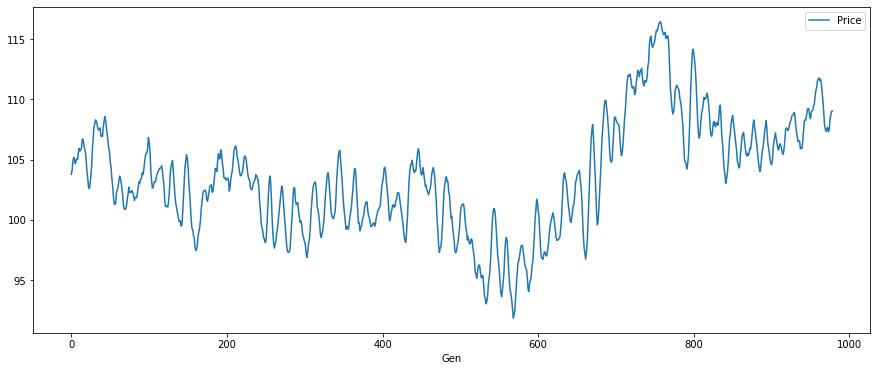

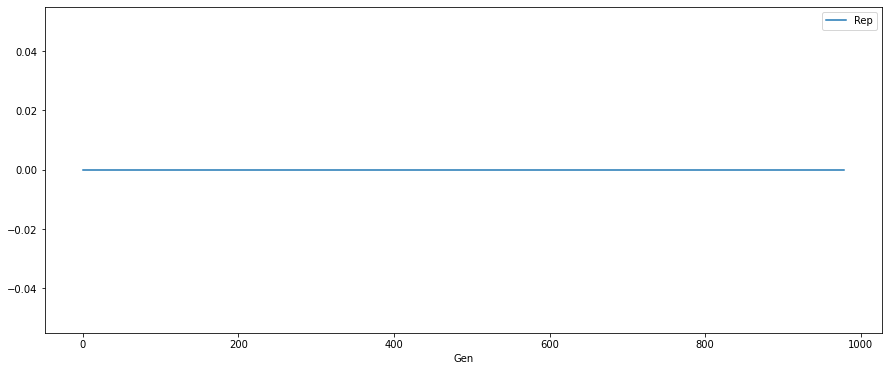

In [100]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Rep'],
        kind="line", figsize=(15, 6))
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


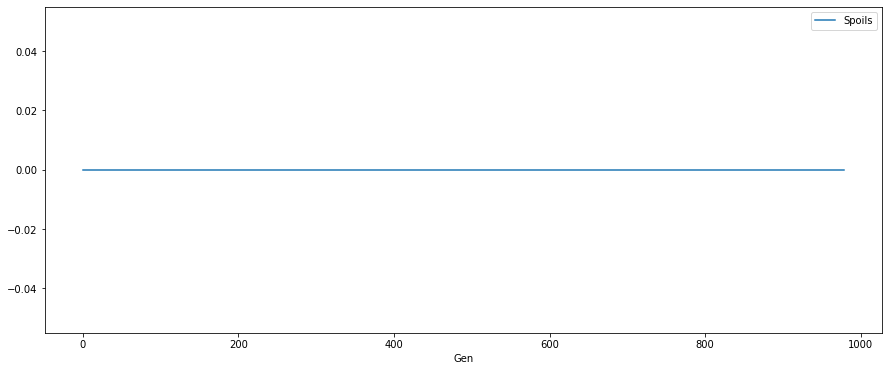

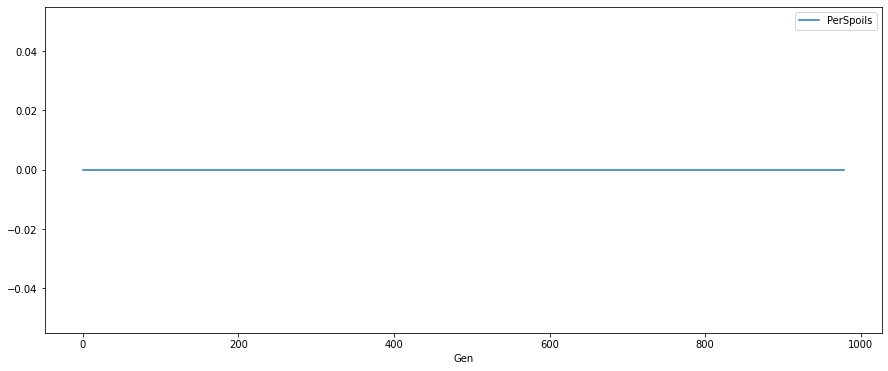

In [101]:

df['AbsSpoils'] = [abs(ele) for ele in df['Spoils']]
df['LogAbsSpoils'] = np.log(df['AbsSpoils'])

df.plot(x="Gen", y = ['Spoils'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['PerSpoils'],
        kind="line", figsize=(15, 6))
plt.show()

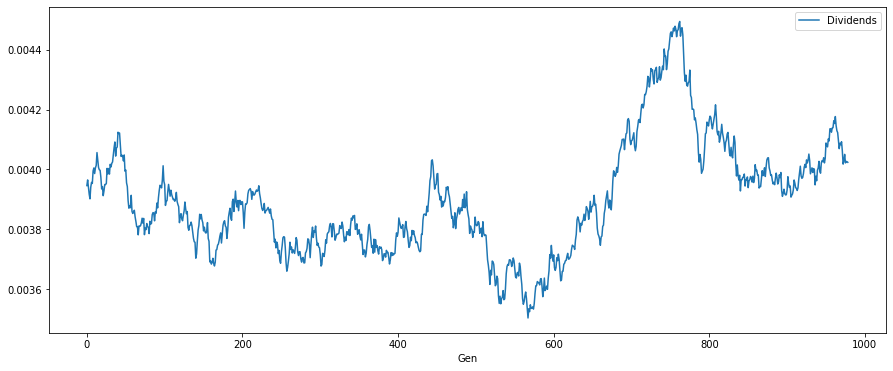

In [102]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



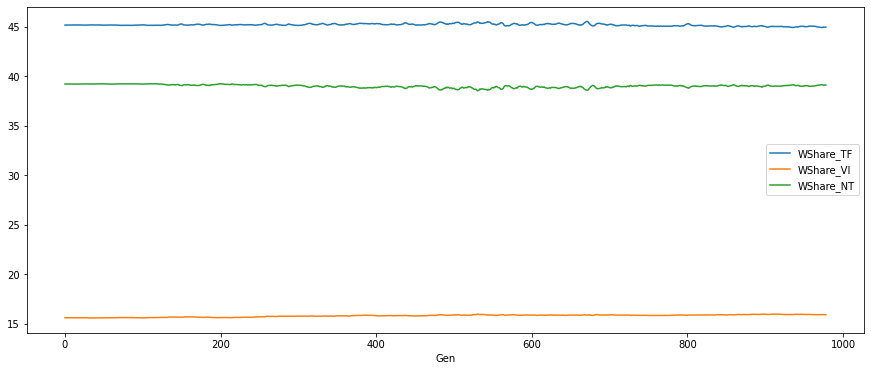

In [103]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()



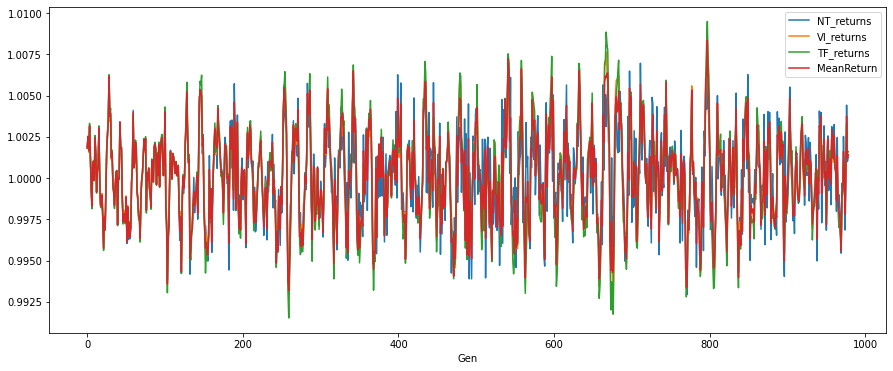

In [104]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

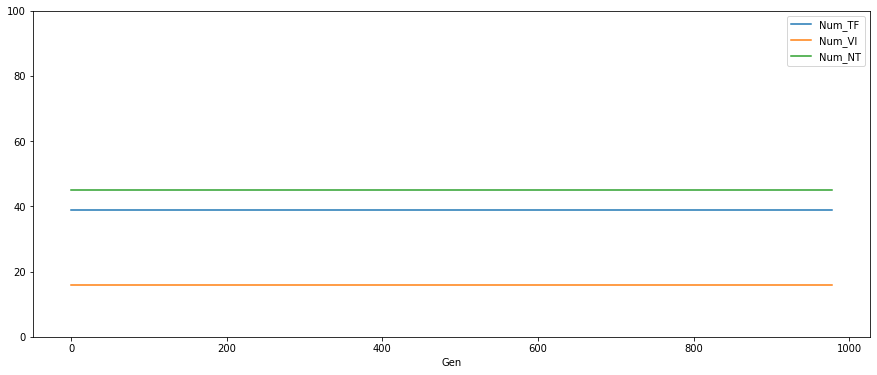

In [105]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.show()

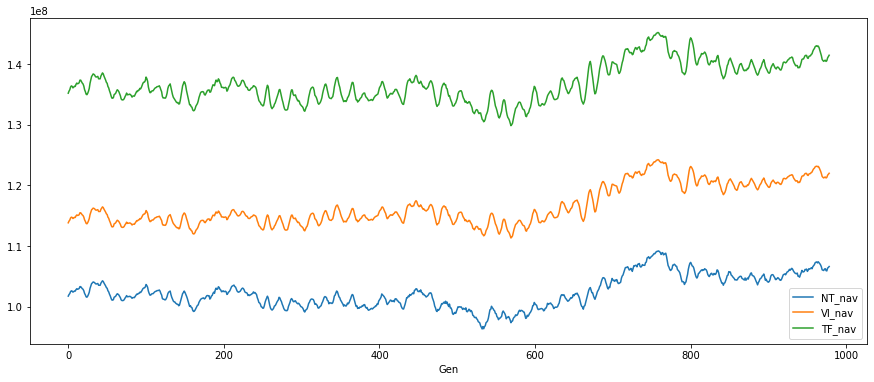

In [106]:
''' NAV '''
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


1.0000711282327999


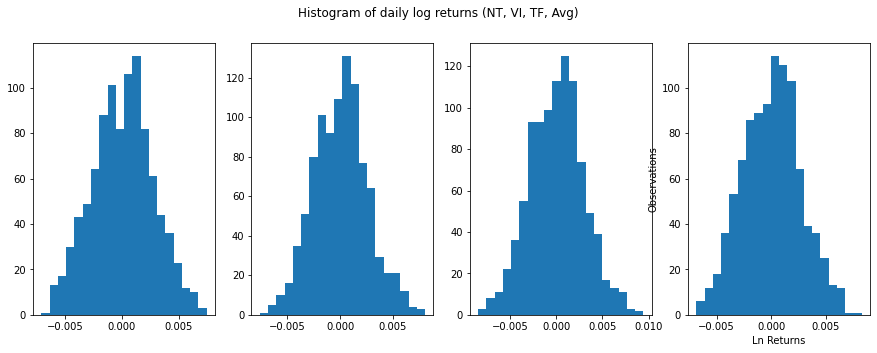

In [107]:
''' Histogram of the daily strategy returns '''

print(np.mean(df['MeanReturn'])) # Daily







fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of daily log returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_returns']), bins = 20)
ax2.hist(np.log(df['VI_returns']), bins = 20)
ax3.hist(np.log(df['TF_returns']), bins = 20)
ax4.hist(np.log(df['MeanReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Ln Returns')
plt.show()

# TODO: add monthly returns





In [108]:
print(df['NT_MonReturns'].mean())
print(df['VI_MonReturns'].mean())
print(df['TF_MonReturns'].mean())
print(df['AvgMonReturn'].mean())

-0.026480139227517987
7.598566052053402e-05
-0.019260681266270365
-0.019415570640545245
0      0.001823
1      0.002455
2      0.001574
3      0.002972
4      0.001169
         ...   
974   -0.001295
975    0.000744
976    0.002982
977    0.001319
978    0.001348
Name: VI_MonReturns, Length: 979, dtype: float64
0     -0.000288
1     -0.000383
2     -0.000437
3     -0.000526
4     -0.000541
         ...   
974   -0.040698
975   -0.040727
976   -0.040825
977   -0.040847
978   -0.040857
Name: TF_MonReturns, Length: 979, dtype: float64


1.0010935454758145


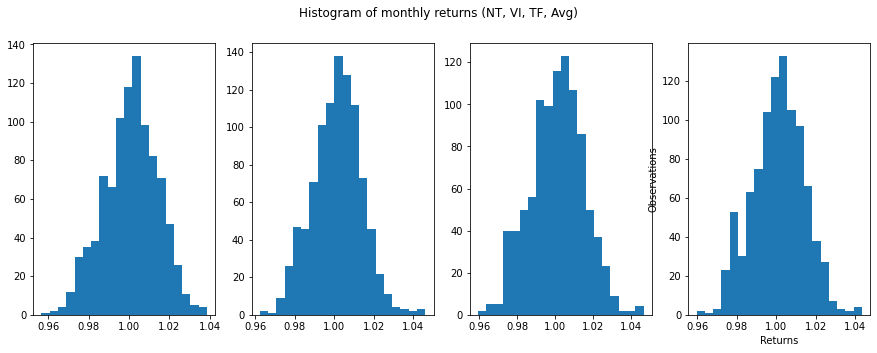

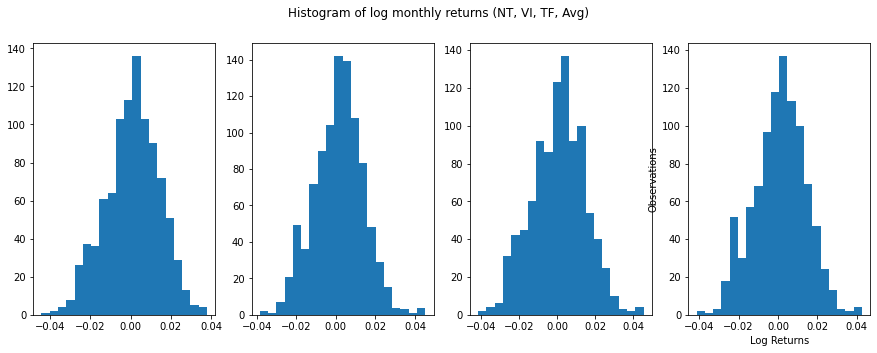

In [109]:
''' Monthly strategy returns '''



NT_monthly_returns = [np.nan] * 21
NT_daily_wealth = df['NT_nav'].to_numpy()
i = 21
while i < len(NT_daily_wealth):
    try:
        NT_monthly_returns.append(NT_daily_wealth[i] / NT_daily_wealth[i-21])
    except:
        NT_monthly_returns.append(0)
    i += 1

VI_monthly_returns = [np.nan] * 21
VI_daily_wealth = df['VI_nav'].to_numpy()
i = 21
while i < len(VI_daily_wealth):
    try:
        VI_monthly_returns.append(VI_daily_wealth[i] / VI_daily_wealth[i-21])
    except:
        VI_monthly_returns.append(0)
    i += 1

TF_monthly_returns = [np.nan] * 21
TF_daily_wealth = df['TF_nav'].to_numpy()
i = 21
while i < len(TF_daily_wealth):
    try:
        TF_monthly_returns.append(TF_daily_wealth[i] / TF_daily_wealth[i-21])
    except: 
        TF_monthly_returns.append(0)
    i += 1


AvgMonthlyReturn = []
for i in range(len(VI_monthly_returns)):
    AvgMonthlyReturn.append((TF_monthly_returns[i] + NT_monthly_returns[i] + VI_monthly_returns[i]) / 3)

df['MonthlyReturn'] = AvgMonthlyReturn
df['NT_MonthlyReturn'] = NT_monthly_returns
df['VI_MonthlyReturn'] = VI_monthly_returns
df['TF_MonthlyReturn'] = TF_monthly_returns

print(np.mean(df['MonthlyReturn'])) # Daily


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of monthly returns (NT, VI, TF, Avg)')
ax1.hist(df['NT_MonthlyReturn'], bins = 20)
ax2.hist(df['VI_MonthlyReturn'], bins = 20)
ax3.hist(df['TF_MonthlyReturn'], bins = 20)
ax4.hist(df['MonthlyReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Returns')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of log monthly returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_MonthlyReturn']), bins = 20)
ax2.hist(np.log(df['VI_MonthlyReturn']), bins = 20)
ax3.hist(np.log(df['TF_MonthlyReturn']), bins = 20)
ax4.hist(np.log(df['MonthlyReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Log Returns')
plt.show()

Bin